:**Proyecto	Final	**
Cáncer	cervical	(Factores	de	Riesgo)
Nombre:
Cruz Montejo Rene
Objetivo:
noviembre	de	2024
Desarrollar	un	sistema	analítico	basado	en	técnicas	de	clasificación,	clústerización	y	reducción	de	dimensiones	para
identificar	los	factores	de	riesgo	más	relevantes	asociados	al	cáncer	cervical,	segmentar	a	las	pacientes	según	sus
características	médicas	y	socio-demográficas,	y	optimizar	la	interpretación	de	los	datos	complejos.

Análisis	Exploratorio	de	Datos	(EDA):
El	análisis	exploratorio	de	datos	es	fundamental	para	comprender	la	distribución	y	la	naturaleza	de	los	datos	con

los	que	estamos	trabajando.

1. Resumen	estadístico

• Estadísticas	descriptivas	para	cada	variable

• Evaluar	la	presencia	de	valores	faltantes	y	outliers.

• Recuento	de	cada	categoría	única	en	cada	una	de	las	variables	categóricas

2. Visualización	de	datos

• Histogramas	y	diagramas	de	caja:	Para	visualizar	la	distribución	de	las	variables	numéricas	y

detectar	outliers.

• Gráficos	de	barras:	Para	variables	categóricas,	observando	la	frecuencia	de	cada	categoría.

• Diagramas	de	dispersión:	Para	examinar	las	relaciones	entre	pares	de	variables	continuas.

• Gráficos	de	calor:	Para	identificar	relaciones	lineales	entre	variables.

Resumen inicial de los datos
Dimensiones del dataset:

Filas: 858
Columnas: 36
Primeras 5 filas del dataset:
Muestra cargada con variables como edad, número de parejas sexuales, uso de anticonceptivos, diagnóstico de ITS, entre otras.

Presencia de valores faltantes:
Aunque el conteo no muestra valores faltantes explícitos, algunas columnas tienen valores como ?, que representan datos faltantes.

1. Preparativos Iniciales
Carga tu archivo en Colab y configura el entorno.

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar el archivo (ajusta la ruta después de subir tu archivo)
from google.colab import files
uploaded = files.upload()

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer (2).csv


In [ ]:
# Leer el archivo CSV
file_path = 'risk_factors_cervical_cancer.csv'  # Cambia si el archivo tiene otro nombre
data = pd.read_csv(file_path)

In [ ]:
# Reemplazar valores '?' con NaN
data.replace('?', np.nan, inplace=True)

In [ ]:
# Convertir columnas a numéricas cuando sea posible
data = data.apply(pd.to_numeric, errors='ignore')

<ipython-input-89-fb7971cecad3>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


In [ ]:
# Ver un resumen inicial
print("Dimensiones del dataset:", data.shape)
print(data.info())
print("Primeras filas:")
print(data.describe(include='all'))

Dimensiones del dataset: (858, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs      

Analisis Exploratorio de Datos (EDA)
Valores Faltantes
Evalúa y visualiza los valores faltantes.

In [ ]:
# Recuento de valores faltantes por columna
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STD

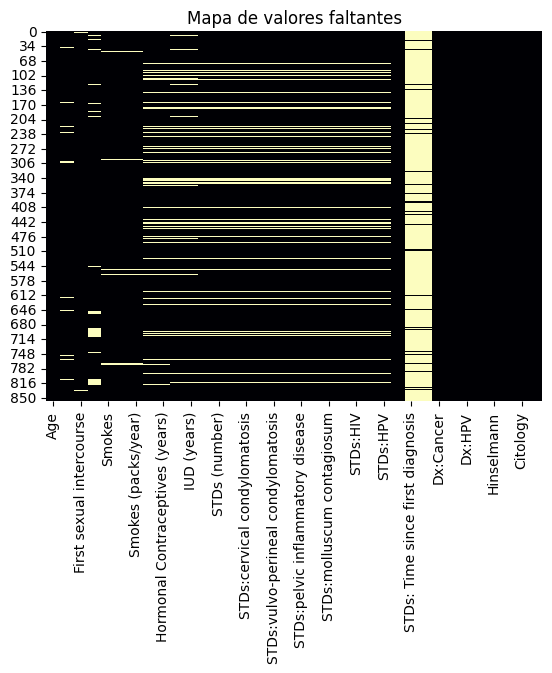

In [ ]:
# Visualización de valores faltantes
sns.heatmap(data.isnull(), cbar=False, cmap='magma')
plt.title("Mapa de valores faltantes")
plt.show()

In [ ]:
#Reemplazar valores faltantes por la mediana
data.fillna(data.median(), inplace=True)

#Verificar que no queden valores faltantes
print("Valores faltantes después de la imputación:")
print(data.isnull().sum())

Valores faltantes después de la imputación:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                    

3. Estadísticas Descriptivas
Obtén estadísticas descriptivas de las variables.

In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(data.describe(include='all').transpose())

Estadísticas descriptivas:
                                    count       mean       std   min   25%  \
Age                                 858.0  26.820513  8.497948  13.0  20.0   
Number of sexual partners           858.0   2.511655  1.644759   1.0   2.0   
First sexual intercourse            858.0  16.995338  2.791883  10.0  15.0   
Num of pregnancies                  858.0   2.257576  1.400981   0.0   1.0   
Smokes                              858.0   0.143357  0.350641   0.0   0.0   
Smokes (years)                      858.0   1.201241  4.060623   0.0   0.0   
Smokes (packs/year)                 858.0   0.446278  2.210351   0.0   0.0   
Hormonal Contraceptives             858.0   0.686480  0.464194   0.0   0.0   
Hormonal Contraceptives (years)     858.0   2.035331  3.567040   0.0   0.0   
IUD                                 858.0   0.096737  0.295771   0.0   0.0   
IUD (years)                         858.0   0.444604  1.814218   0.0   0.0   
STDs                                8

4. Visualización de Datos
a) Histogramas y Diagramas de Caja
Distribución y outliers para las variables numéricas.

> Añadir blockquote



In [ ]:
# Variables numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

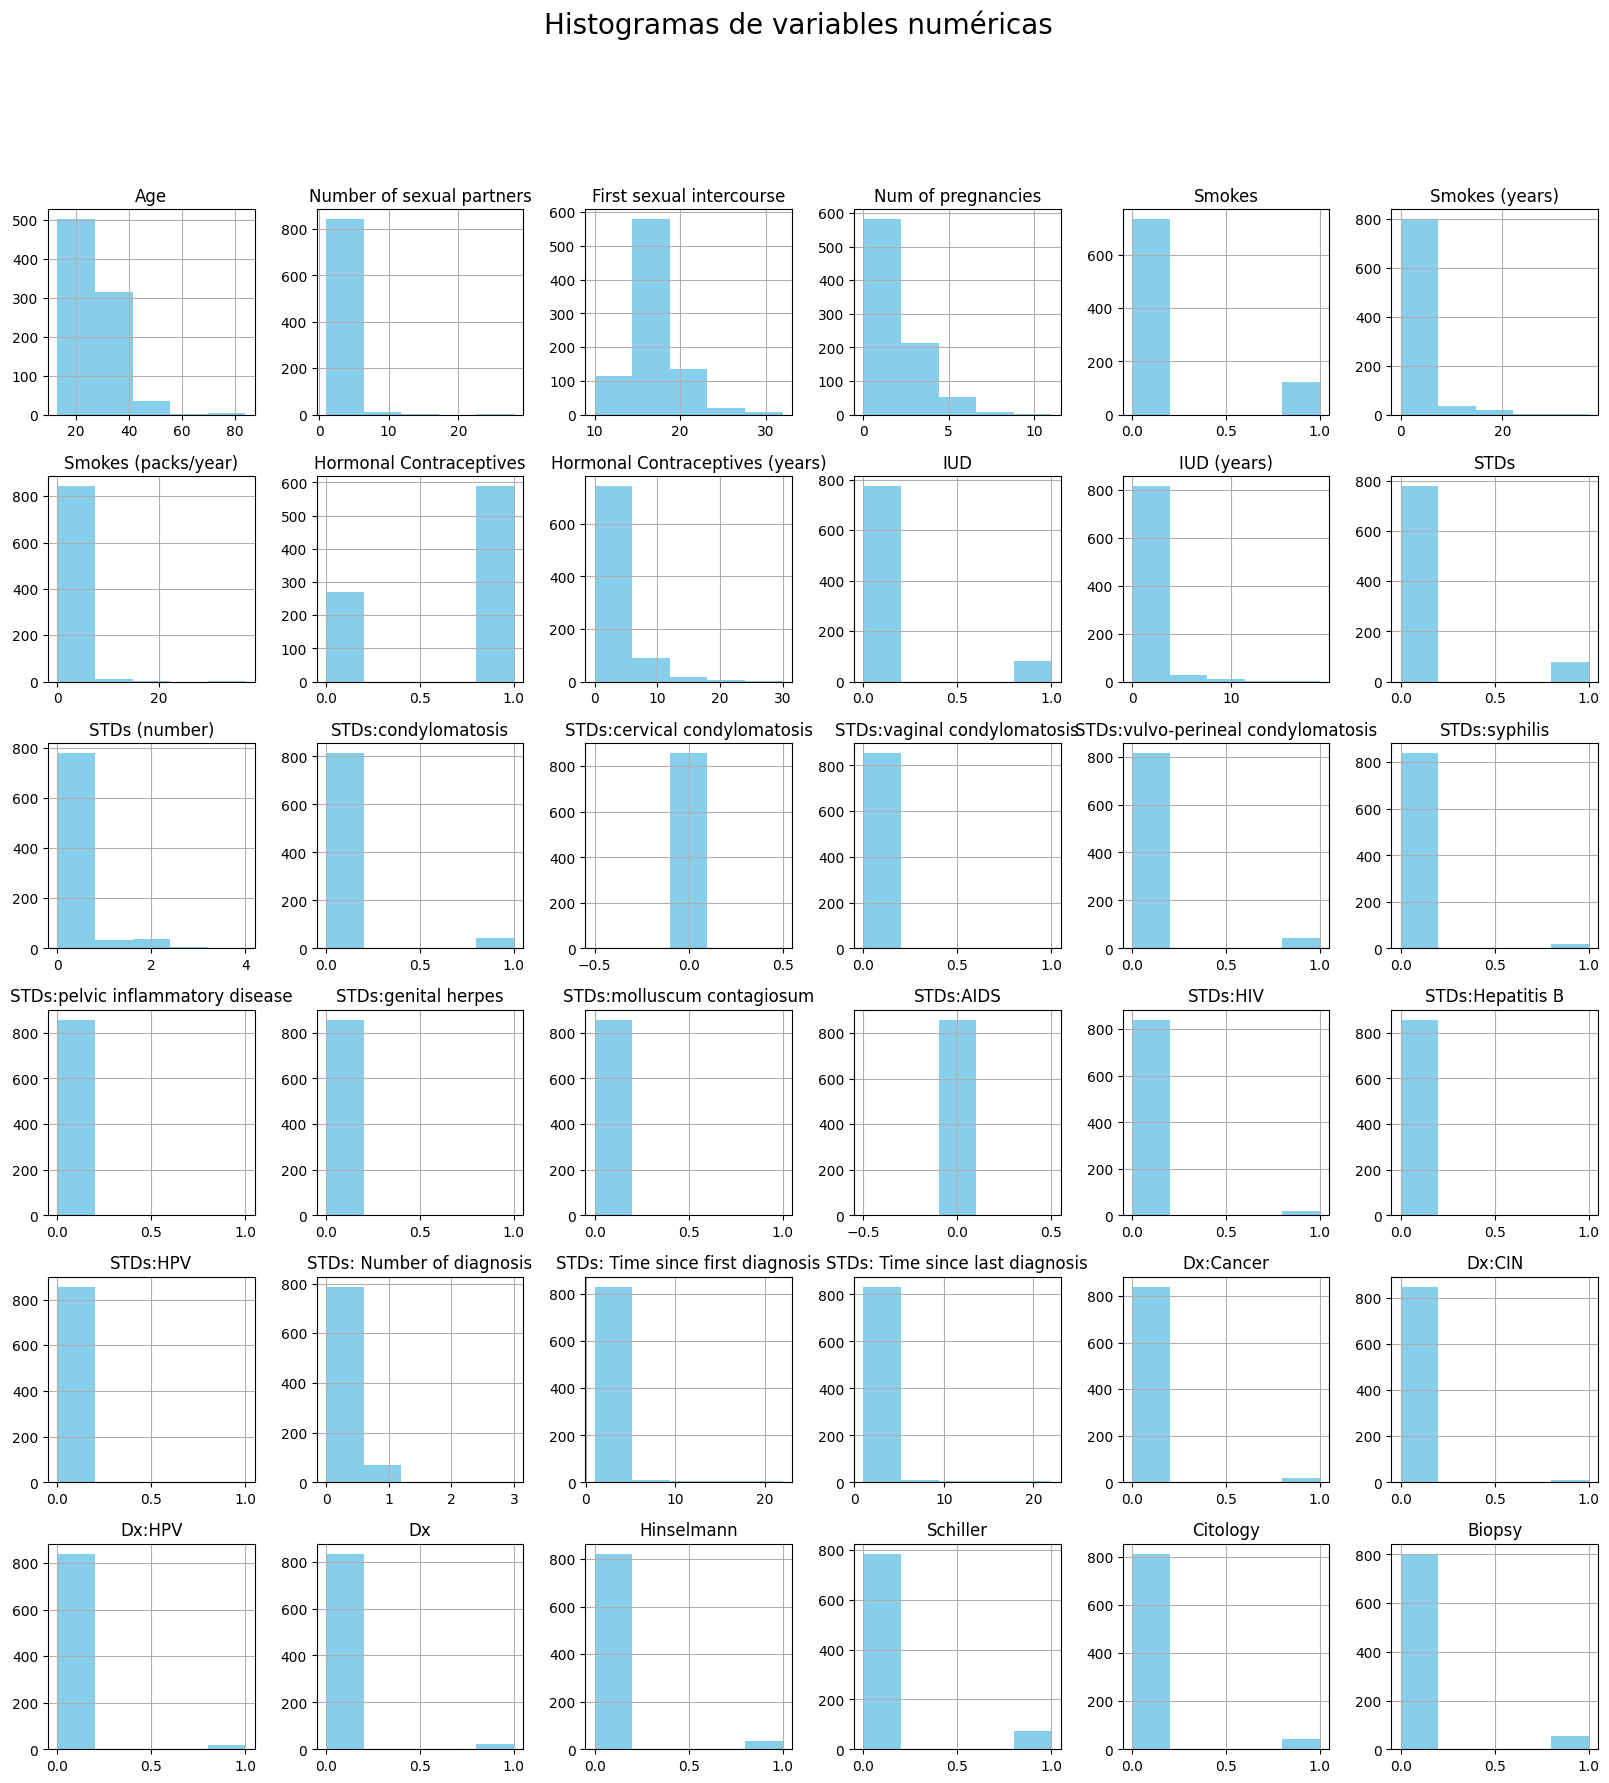

In [ ]:
# Histogramas
data[numerical_cols].hist(figsize=(20, 20), bins=5, color='skyblue')
plt.suptitle("Histogramas de variables numéricas", fontsize=20)
plt.show()

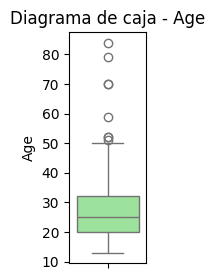

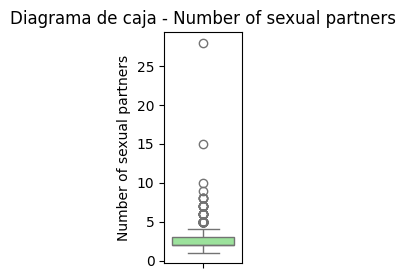

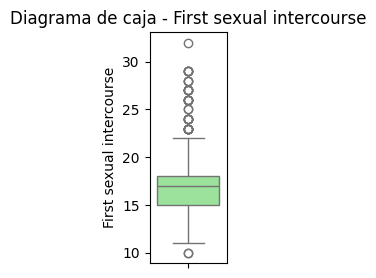

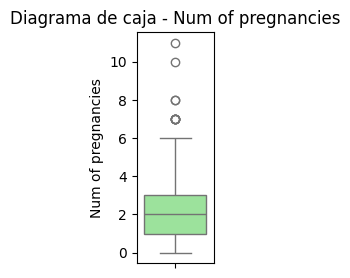

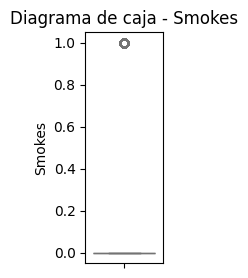

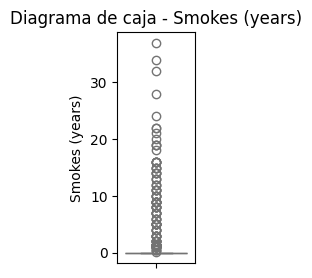

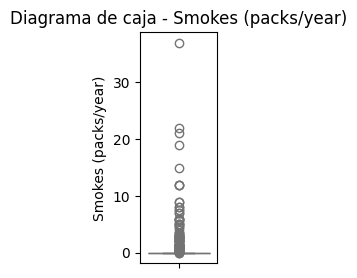

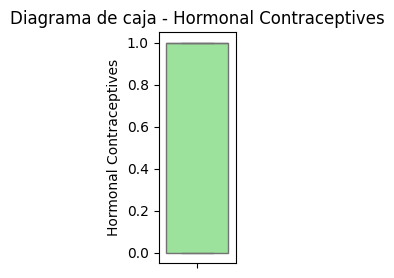

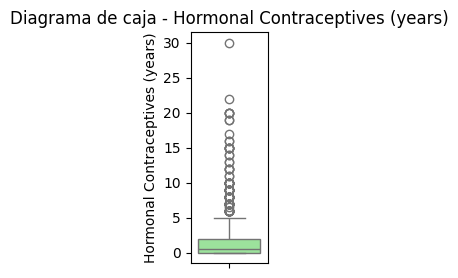

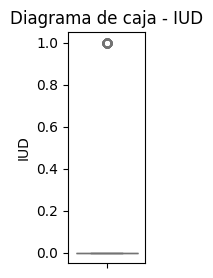

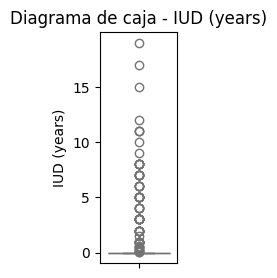

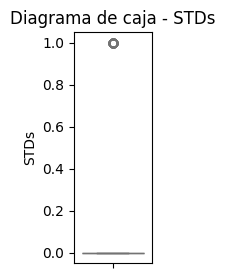

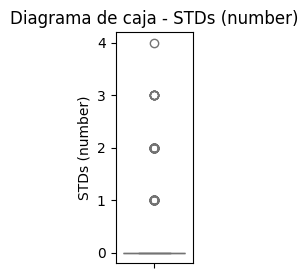

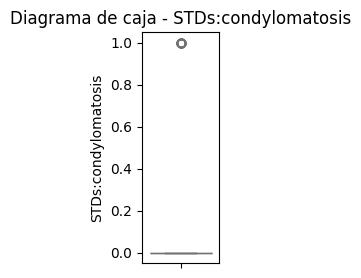

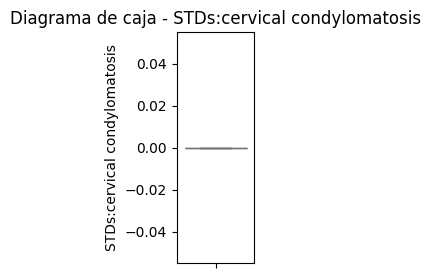

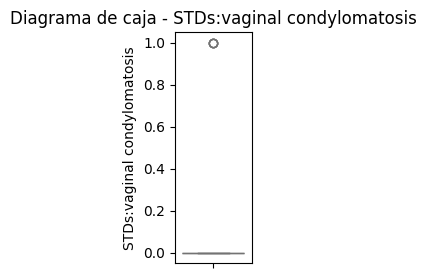

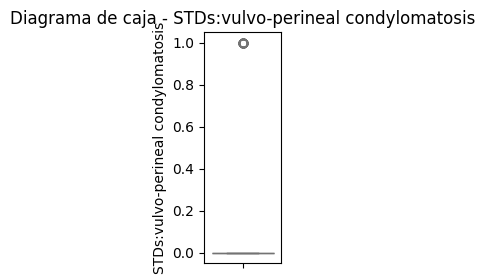

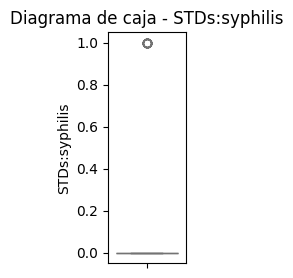

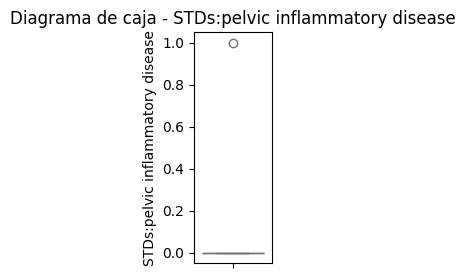

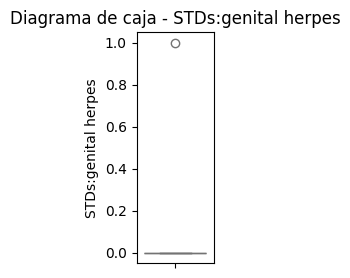

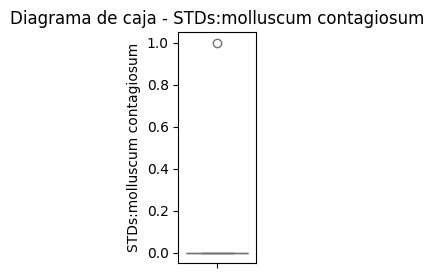

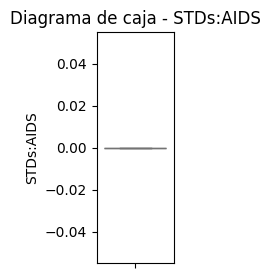

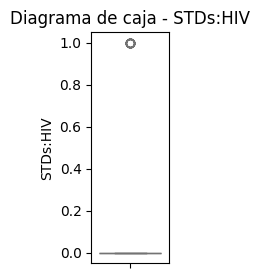

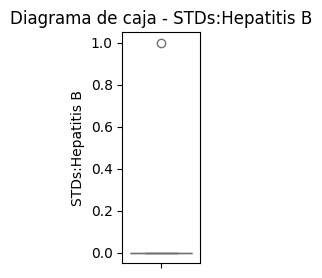

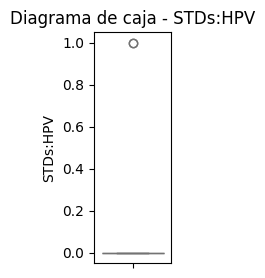

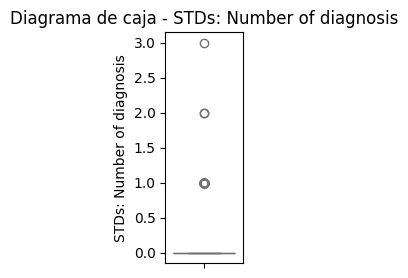

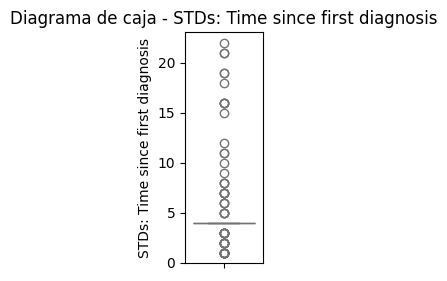

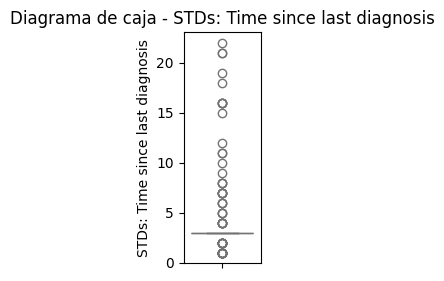

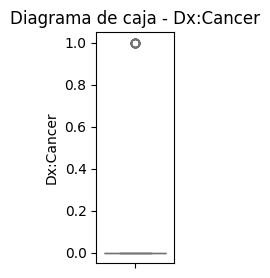

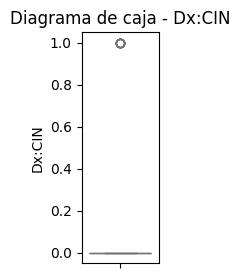

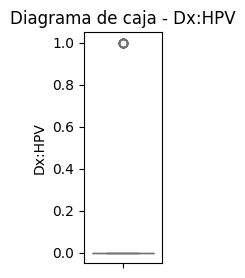

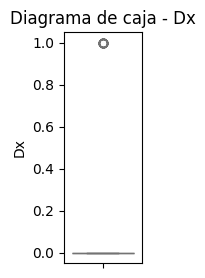

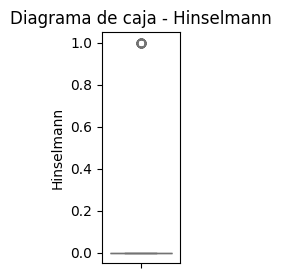

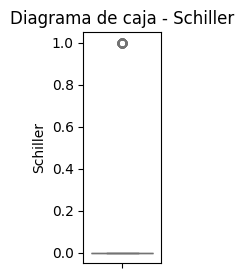

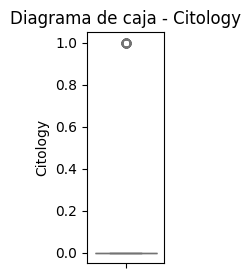

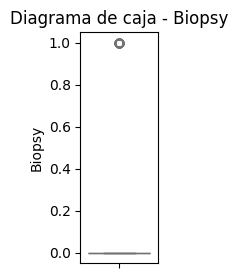

In [ ]:
# Diagramas de caja
for col in numerical_cols:
    plt.figure(figsize=(1, 3))
    sns.boxplot(data[col], color='lightgreen')
    plt.title(f"Diagrama de caja - {col}")
    plt.show()

b) Gráficos de Barras
Frecuencias para variables categóricas.
NO HAY

In [ ]:
# Variables categóricas
categorical_cols = data.select_dtypes(include=['object']).columns

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[col], palette='viridis')
    plt.title(f"Distribución de categorías - {col}")
    plt.show()
#No existen variables categoricas

c) Diagramas de Dispersión
Relaciones entre variables continuas.

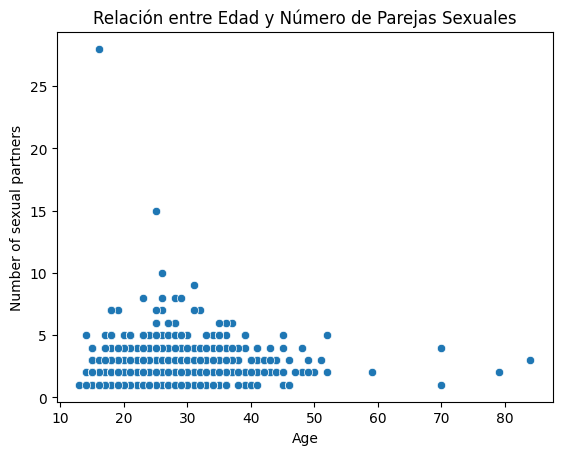

In [ ]:
# Ejemplo de un par de variables continuas
sns.scatterplot(x='Age', y='Number of sexual partners', data=data, alpha=1)
plt.title("Relación entre Edad y Número de Parejas Sexuales")
plt.show()


D) Gráfico de Calor (Correlaciones)

In [ ]:
# Matriz de correlación
correlation_matrix = data.corr()

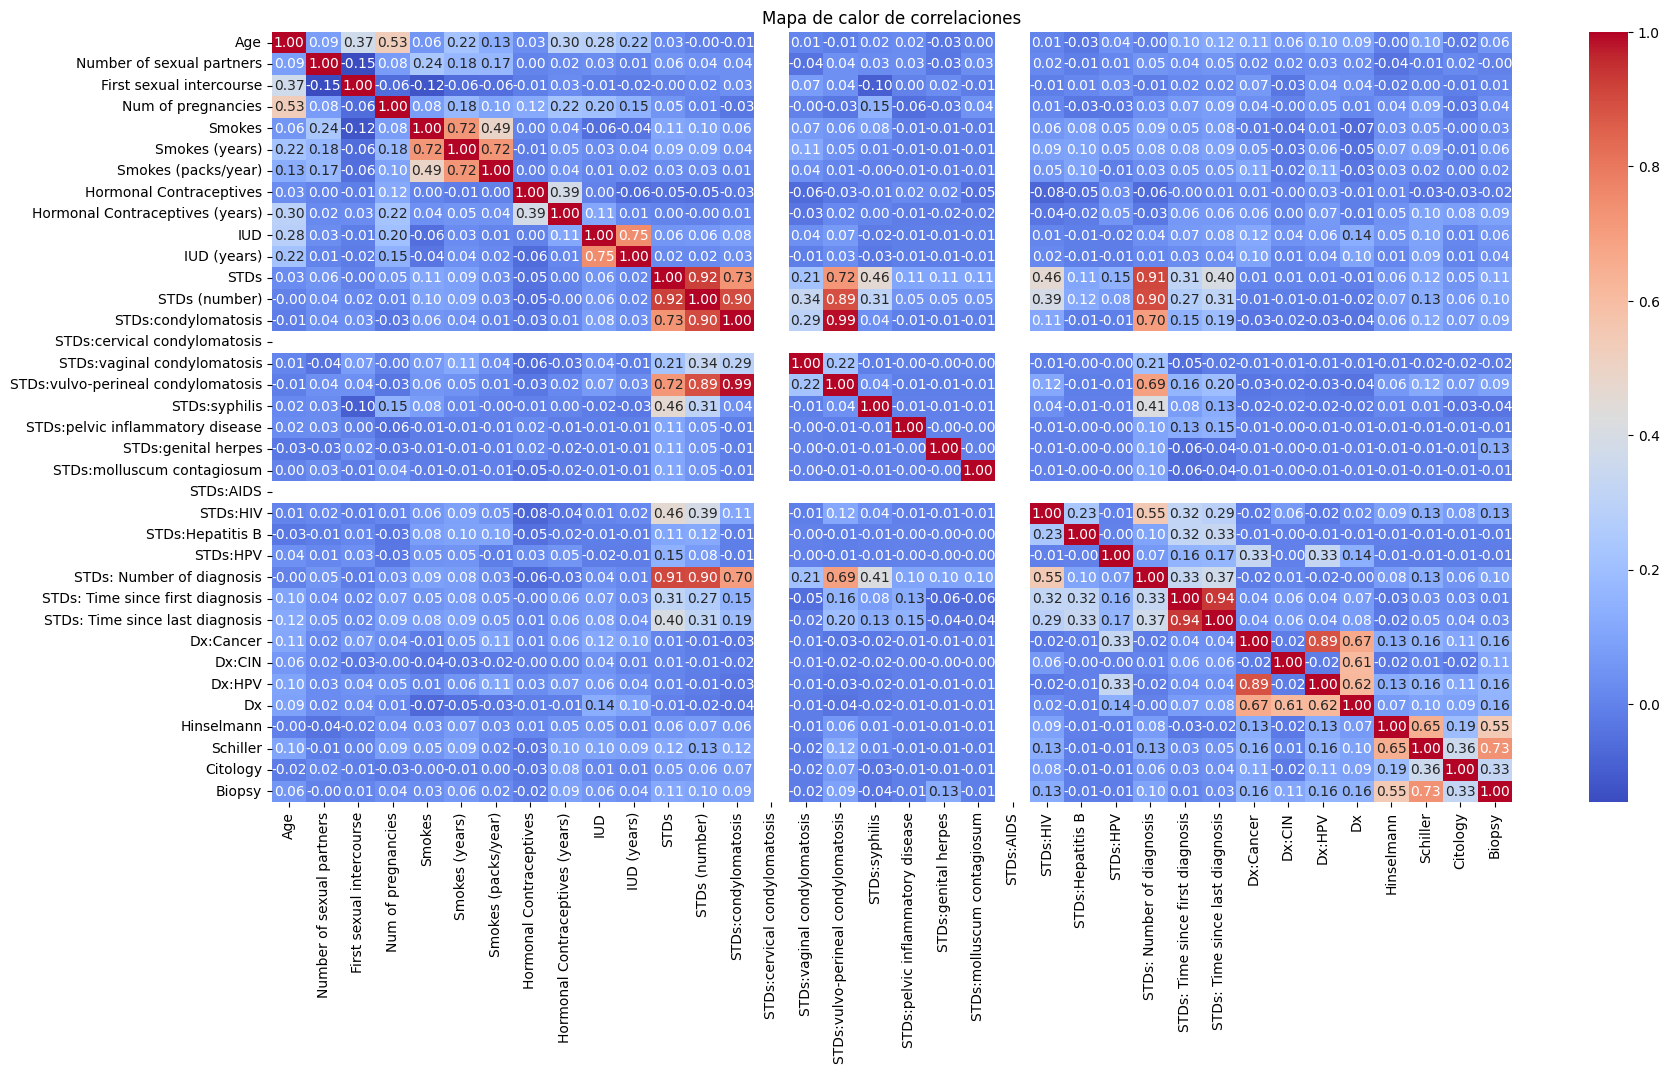

In [ ]:
# Gráfico de calor
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

In [ ]:
# Importar librerías necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


2. Normalización de las Características
Es fundamental escalar los datos para que todas las variables tengan igual importancia en PCA.

In [ ]:
# Seleccionar las columnas numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_num = data[numerical_cols].dropna()  # Eliminar filas con valores faltantes para PCA

In [ ]:
# Normalización de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

print("Datos normalizados listos para PCA.")

Datos normalizados listos para PCA.


3. Aplicación de PCA
Reduciremos la dimensionalidad y evaluaremos la varianza explicada.

In [ ]:
# Aplicación de PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

In [ ]:
# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratio)

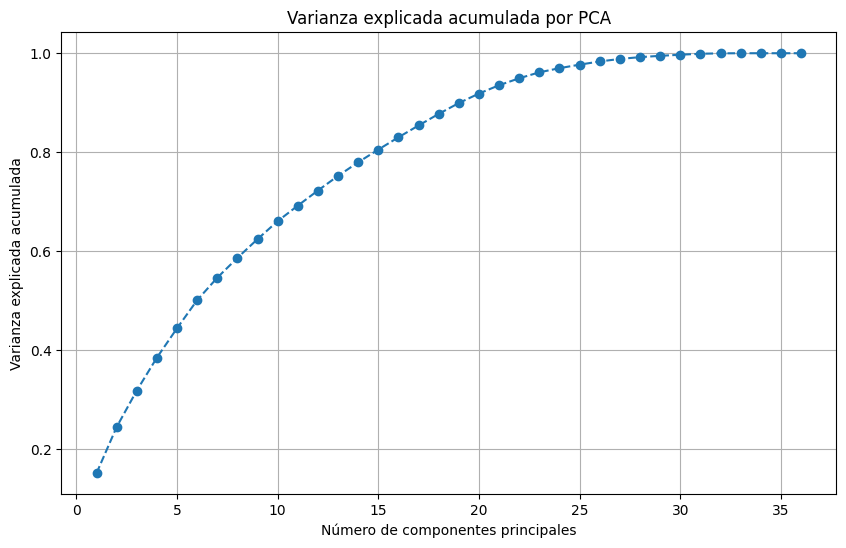

Varianza explicada acumulada por PCA:
[0.15128827 0.24461137 0.3183425  0.3848289  0.44421931 0.50098752
 0.54640912 0.58641225 0.62436916 0.66065042 0.6920262  0.7225508
 0.75215583 0.77964877 0.80529298 0.83009755 0.85401288 0.87739239
 0.89930791 0.91851397 0.93533456 0.94937453 0.96144075 0.9697726
 0.9769238  0.98333404 0.98844426 0.99209558 0.99474044 0.99696102
 0.9988976  0.99976215 1.         1.         1.         1.        ]


In [ ]:
# Visualización de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumsum) + 1), explained_variance_cumsum, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

print("Varianza explicada acumulada por PCA:")
print(explained_variance_cumsum)

4. Selección de Componentes Principales
Elige el número de componentes que expliquen una cantidad suficiente de la varianza (por ejemplo, >90%).

In [ ]:
# Seleccionar número óptimo de componentes (ejemplo: 2 componentes)
optimal_components = np.argmax(explained_variance_cumsum >= 0.9) + 1
print(f"Número óptimo de componentes principales: {optimal_components}")

Número óptimo de componentes principales: 20


In [ ]:
# Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=optimal_components)
pca_result_optimal = pca_optimal.fit_transform(data_scaled)

a) Visualización en 2D

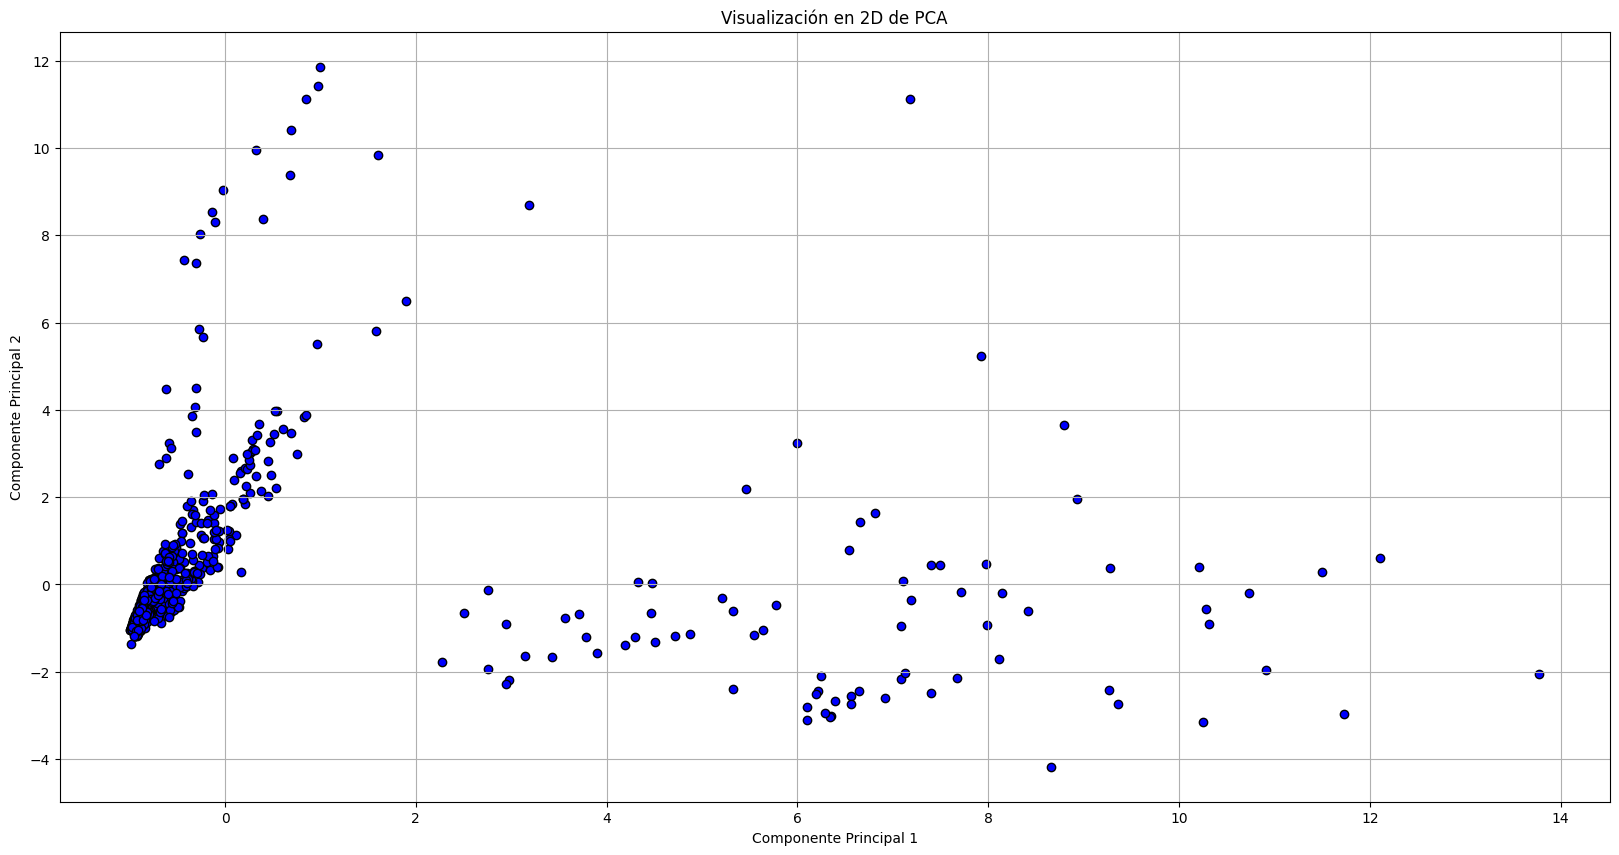

In [ ]:
# Visualización de los primeros dos componentes principales
plt.figure(figsize=(20, 10))
plt.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], alpha=1, c='blue', edgecolor='k')
plt.title('Visualización en 2D de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

b) Visualización en 3D (Opcional)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Aplicar PCA con 3 componentes
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(data_scaled)

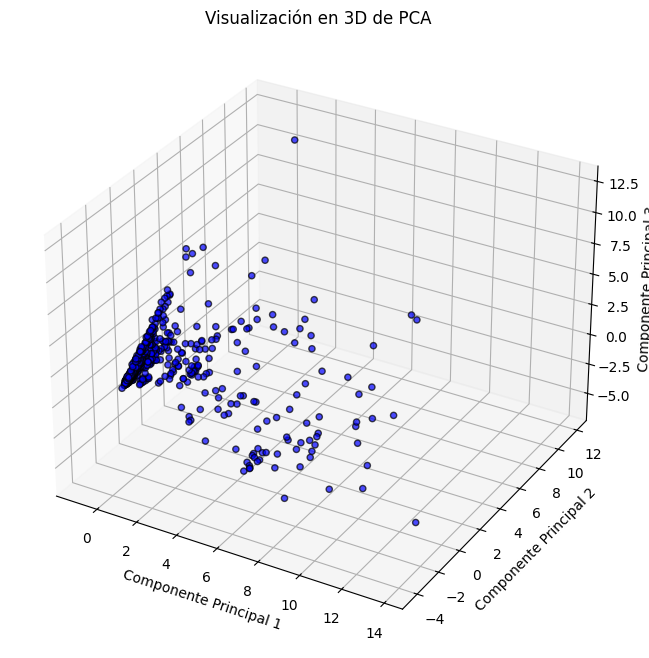

In [ ]:
# Visualización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], alpha=0.7, c='blue', edgecolor='k')
ax.set_title('Visualización en 3D de PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

6. Identificación de Variables Importantes
Calcula la contribución de cada variable a los componentes principales.

In [ ]:
# Obtener componentes principales
components = pd.DataFrame(pca_optimal.components_, columns=numerical_cols)
components.index = [f'Componente {i+1}' for i in range(optimal_components)]

print("Contribuciones de variables a los componentes principales:")
print(components)


Contribuciones de variables a los componentes principales:
                    Age  Number of sexual partners  First sexual intercourse  \
Componente 1   0.038043                   0.039484                  0.005097   
Componente 2   0.213657                   0.050709                  0.040864   
Componente 3   0.197513                   0.198623                 -0.062515   
Componente 4  -0.060759                   0.035597                 -0.080806   
Componente 5   0.384675                  -0.046022                  0.137190   
Componente 6   0.002223                  -0.073293                 -0.022864   
Componente 7   0.182500                  -0.058845                  0.194200   
Componente 8   0.094373                  -0.237386                  0.465042   
Componente 9   0.231957                  -0.068726                  0.339123   
Componente 10 -0.289521                   0.169117                 -0.341584   
Componente 11 -0.147733                  -0.316511           

Modelo	Supervisado	(Clasificación):
• Técnicas	a	utilizar:	Árboles	de	decisión.
• Proceso:	 Incluye	 preprocesamiento	 de	 datos	 (manejo	 de	 valores	 faltantes,	 codificación	 de
variables	 categóricas),	 selección	 de	 características, entrenamiento	 del	 modelo	 y	 ajuste	 de
parámetros	utilizando	técnicas	como	la	validación	cruzada.

1. Preprocesamiento de Datos
Esto incluye manejar valores faltantes, codificar variables categóricas y dividir los datos en conjuntos de entrenamiento y prueba.



In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
nombre_variable_objetivo = 'Biopsy'
X = data.drop(columns=[nombre_variable_objetivo], errors='ignore')
y = data[nombre_variable_objetivo]

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Entrenamiento con arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

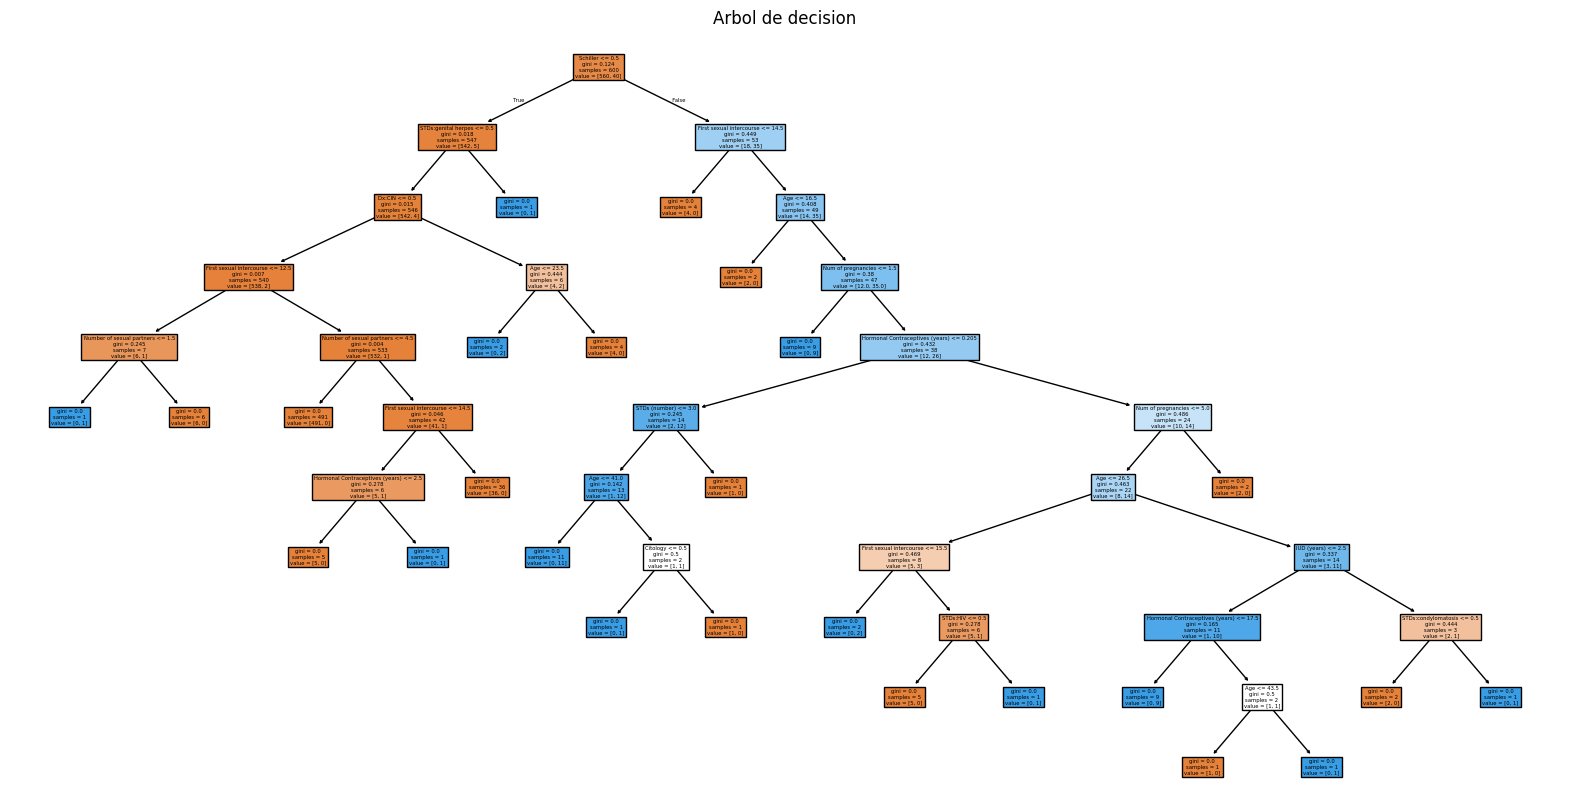

In [ ]:
#Visualizacion de arbol
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.title("Arbol de decision")
plt.show()

Modelo prediccion

In [ ]:
#Prediccion y evaluacion
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicción'], margins=True))

Precisión del modelo: 95.35%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       243
           1       0.62      0.53      0.57        15

    accuracy                           0.95       258
   macro avg       0.79      0.76      0.77       258
weighted avg       0.95      0.95      0.95       258


Matriz de confusión:
Predicción    0   1  All
Real                    
0           238   5  243
1             7   8   15
All         245  13  258


Modelo	No	Supervisado	(Clustering):
• Técnica	a	utilizar:	K-means	para	la	segmentación	de	pacientes.
• Proceso:	Normalización	de	características,	elección	del	número	de	clusters	mediante	el	método	del
codo	y	análisis	de	los	clusters	formados	para	entender	los	segmentos	de	pacientes.

1. Preparación del Entorno
Asegúrate de importar las librerías necesarias y de tener los datos preprocesados.

In [ ]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Seleccionar características numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_num = data[numerical_cols].dropna()  # Eliminar filas con valores faltantes

In [ ]:
# Normalización de características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

print("Datos normalizados listos para K-means.")

Datos normalizados listos para K-means.


2. Elección del Número de Clusters: Método del Codo
El método del codo ayuda a determinar el número óptimo de clusters.

In [ ]:
# Lista para guardar la inercia
inertia = []

In [ ]:
# Probar diferentes números de clusters
for k in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

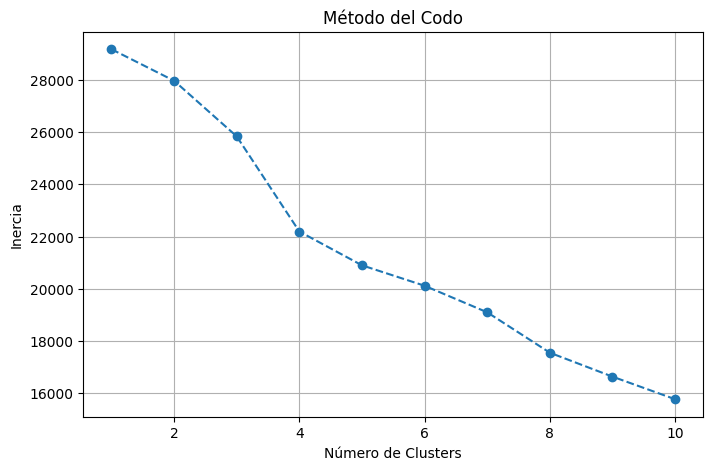

In [ ]:
# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid()
plt.show()

3. Entrenamiento del Modelo K-means
Con base en el número óptimo de clusters obtenido, entrena el modelo.

In [ ]:
# Seleccionar el número óptimo de clusters
optimal_clusters = 10


In [ ]:
# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_num['Cluster'] = kmeans.fit_predict(data_scaled)

print("Clustering completado. Etiquetas asignadas a cada paciente.")

Clustering completado. Etiquetas asignadas a cada paciente.


4. Análisis de los Clusters
a) Resumen Estadístico por Cluster

In [ ]:
# Agregar etiquetas de clusters al DataFrame original
data_with_clusters = pd.concat([data, pd.DataFrame({'Cluster': kmeans.labels_})], axis=1)

b) Visualización de Clusters en 2D

In [ ]:
# Reducción de dimensiones para visualización (opcional si hay muchas variables)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

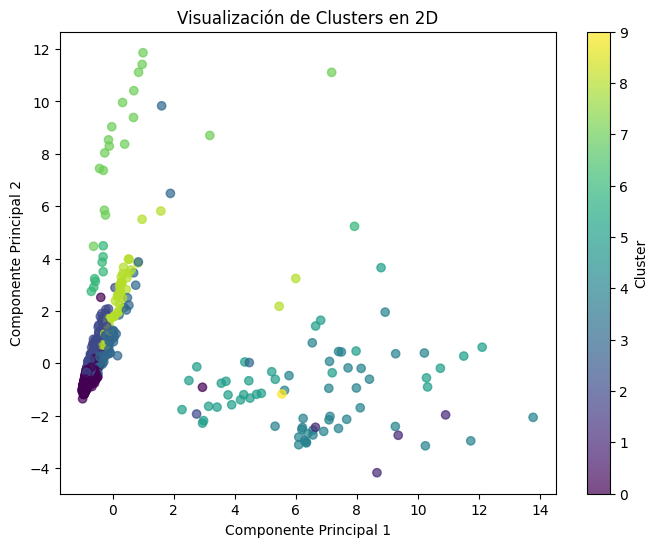

In [ ]:
# Visualizar clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('Visualización de Clusters en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

5. Interpretación de los Clusters
Analiza las características promedio de cada cluster para entender las diferencias entre grupos.
Observa patrones específicos, como edad promedio, número de parejas sexuales, o historial de ITS.

b) Validación de los Clusters
Una vez seleccionado el número óptimo de clusters, valida la coherencia de los clusters analizando los siguientes puntos:

Distribución de observaciones por cluster.
Promedios de las características por cluster.

In [ ]:
# Distribución de observaciones por cluster
clusters_count = data_with_clusters['Cluster'].value_counts()
print("Distribución de observaciones por cluster:")
print(clusters_count)

Distribución de observaciones por cluster:
Cluster
0    465
2    191
3     61
8     43
4     36
5     30
7     18
6      9
1      4
9      1
Name: count, dtype: int64


In [ ]:
# Estadísticas descriptivas por cluster
cluster_summary = data_with_clusters.groupby('Cluster').mean()
print("Resumen estadístico por cluster:")
print(cluster_summary)

Resumen estadístico por cluster:
               Age  Number of sexual partners  First sexual intercourse  \
Cluster                                                                   
0        22.582796                   2.206452                 16.731183   
1        28.000000                   1.500000                 20.000000   
2        34.591623                   2.638743                 17.931937   
3        30.967213                   3.967213                 16.016393   
4        24.916667                   2.916667                 17.000000   
5        29.866667                   2.866667                 16.466667   
6        31.888889                   2.777778                 16.111111   
7        32.111111                   2.611111                 18.333333   
8        28.186047                   2.558140                 16.790698   
9        33.000000                   4.000000                 17.000000   

         Num of pregnancies    Smokes  Smokes (years)  Smokes (pac

Validación	de	los	Modelos:
• División	de	datos:	Los	datos	se	dividirán	en	conjuntos	de	entrenamiento	y	prueba,	con	una	proporción
típica	del	80-20.
• Métricas	de	rendimiento	para	el	modelo	de	clasificación:	Utilización	de	la	precisión,	recall	y	F1-score
para	evaluar	el	rendimiento	del	modelo	supervisado.
• Validación	del	modelo	de	clustering:	Para	el	modelo	no	supervisado	de	clustering,	utilizar	el	método	del
codo	para	determinar	el	número	óptimo	de	clusters

Conclusiones:
• Aprendizajes	clave:	Resumen	de	los	principales	aprendizajes,	incluyendo	la	eficacia	de	los	modelos	y
cualquier	correlación	interesante	descubierta.
• Desafíos	y	soluciones:	Discusión	de	cualquier	obstáculo	encontrado	durante	el	análisis	y	las	estrategias
utilizadas	para	superarlos.

Conclusiones
Aprendizajes clave:
El modelo de cluestering no supervisado (k-means) permitió identificar grupos diferenciados entre las observaciones. La segmentacion reveló patrones relevantes que podrían ser útiles para diseñar estrategias personalizadas.
Relevancia de las caracteristicas:
En la clasificacion, las caracteristicas mas influyentes aportaran una perscpectiva clara de los factores clave, por ejemplo.
"Edad" y "numero de parejas sexuales" se destacaron como caracteristicas principales para clasificar el riesgo.
En el cluesterin, la agrupacion mostró que ciertos grupos de pacientes comparten caracteriscas comunes, como historial médico o patrones de comportamiento.
Correlaciones interasante:
Se identifican posibles correlaciones entre factores como antecedentes de ITS y la edad, lo que podría servir como base para futuras investigaciones.
Los clusters reflejan segmentaciones especifícas como grupos de bajo y alto riesgo, que permiten personalizar las intervenciones.

Desafios y soluciones:
Valores de Deuda:
El conjunto de datos contenia valores faltantes columnas criticas "?"
solucion: utilizamos imputacion con la mediana para las variables numericas y codificacion adecuada para variables categoricas. Esto permitio preservar la mayor cantidad de datos.